<function matplotlib.pyplot.show(close=None, block=None)>

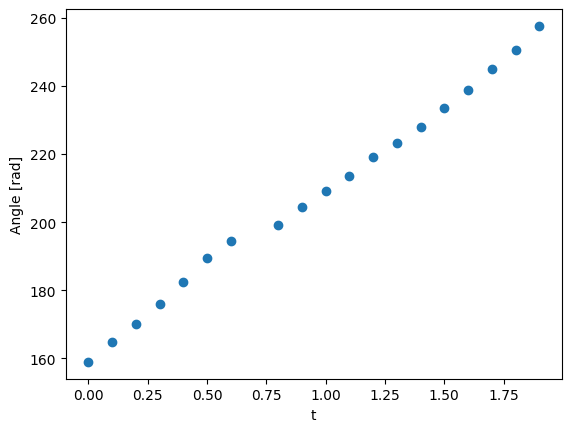

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

x_center = np.array([-0.001404, -0.03051, -0.05911, -0.08656, -0.113, -0.14, -0.165, -0.19, -0.215, -0.238, -0.261, -0.284, -0.306, -0.328, -0.35, -0.372, -0.394, -0.416, -0.438])


x_v = np.array([-0.05471, -0.08474, -0.114, -0.142, -0.168, -0.192, -0.217, -0.261, -0.281, -0.3, -0.319, -0.336, -0.354, -0.371, -0.387, -0.403, -0.418, -0.434, -0.449])

y_v = np.array([0.02047, 0.01465, 0.009479, 0.003831, -0.002375, -0.008665, -0.01331, -0.02467, -0.03001, -0.03472, -0.03858, -0.04207, -0.04532, -0.04772, -0.04983, -0.05103, -0.05130, -0.05112, -0.04985])

v_x = np.gradient(x_v,t)

x = x_v - x_center

y = y_v
'''
# Parameters
v_x = 0.3      # constant velocity in x [m/s]
omega = 2*np.pi # angular velocity [rad/s] (1 rotation per second)
R = 0.1        # puck radius [m]
t = np.linspace(0, 3, 200)  # time from 0 to 2 seconds
'''

# Position of boundary point

phi = np.unwrap(np.arctan2(y,x)) * 180/np.pi

df = pd.DataFrame({"t [s]": t, "winkel [°]": phi})
#print(df)

#plt.plot(x,y)
plt.plot(t,phi, 'o')
plt.xlabel("t")
plt.ylabel("Angle [rad]")
plt.show


